# Merge two GeoTiff files

In [33]:
from osgeo import gdal
import osgeo_utils.gdal_merge
import matplotlib.pyplot as plt

In [34]:
output = 'merged.tiff'
inputs = ['W180.00-S90.00-E000.00-N90.00-LST.tiff', 'E000.00-S90.00-E180.00-N90.00-LST.tiff']
parameters = ['', '-o', output] + inputs + ['-co', 'COMPRESS=LZW']
osgeo_utils.gdal_merge.main(parameters)

...60...70...80...90...100 - done.
0...10...20...30...40...50

In [42]:
ds = gdal.Open(output, gdal.GA_ReadOnly)
band = ds.GetRasterBand(1)
band.SetScale(0.02)
band.SetOffset(0)
band.SetUnitType("K")
band.GetStatistics(True, False)

[0.0, 16654.0, 3740.9436111111, 6299.957253202]

In [40]:
arr = band.ReadAsArray()
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

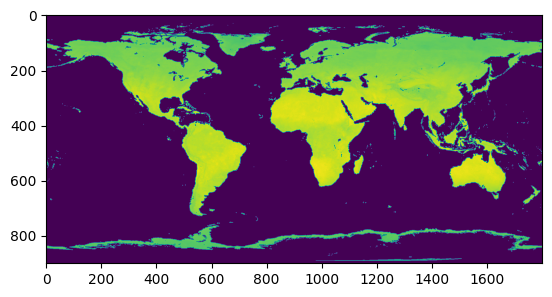

In [41]:
plt.imshow(arr)

In [22]:
from rasterio.plot import show
from rasterio.merge import merge
import rasterio as rio

In [25]:
merged, transform = merge(['W180.00-S90.00-E000.00-N90.00-LST.tiff', 'E000.00-S90.00-E180.00-N90.00-LST.tiff'])
with rio.open('W180.00-S90.00-E000.00-N90.00-LST.tiff') as src:
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": merged.shape[1],
        "width": merged.shape[2],
        "transform": transform
    })

with rio.open("merged_with_rio.tiff", "w", **out_meta) as output:
    output.write(merged)

In [44]:
ds = gdal.Open("merged_with_rio.tiff", gdal.GA_ReadOnly)
ds.GetMetadata()

{'AREA_OR_POINT': 'Area'}

In [68]:
import numpy as np
import matplotlib.pyplot as plt
band = ds.GetRasterBand(1)
arr = band.ReadAsArray()
arr = np.asarray(arr < 65534).nonzero()
arr
# .nonzero().astype(float) * 0.02
# counts, bins = np.histogram(arr, bins='auto')
# plt.stairs(counts, bins)
# band.GetMetadata()
# band.GetStatistics(True, False)

(array([ 33,  33,  34, ..., 891, 891, 891]),
 array([ 678,  679,  525, ..., 1323, 1324, 1325]))

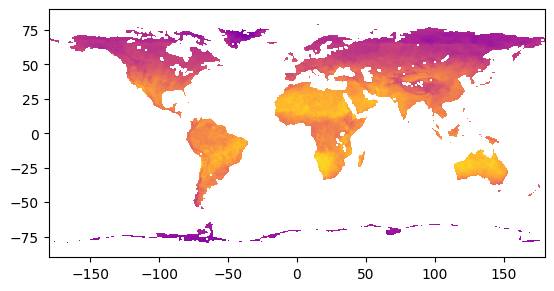

<Axes: >

In [31]:
img = rio.open('merged_with_rio.tiff')
show(img, cmap='plasma')